In [1]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Selecionado e Filtrando 
- Muitas vezes precisamos filtrar os dados crus que obtemos, seja para limpar, seja para analisar um subconjunto específico. Qualquer motivo que seja, você precisará fazer isso muitas vezes.
- O Pandas nos oferece muitas formas de fazer isso. Veja um print da documentação do Pandas

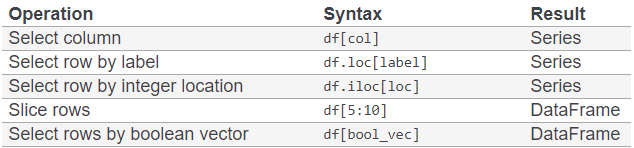

- Vamos usar um DataSet que mostra as queimadas históricas na Região da Amazônia para mostrar todos os jeitos

##  Selecionando com colchetes [  ]

In [9]:
# importando bibliotecas
import pandas as pd

# lendo dados
ender_arquivo = 'data/amazon.csv'
df_amazonia = pd.read_csv(ender_arquivo, encoding='latin', parse_dates=['date'])

# visualização básica dos dados
df_amazonia.head()
df_amazonia.info()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [11]:
# Selecionando a coluna state
df_amazonia['state']

0            Acre
1            Acre
2            Acre
3            Acre
4            Acre
          ...    
6449    Tocantins
6450    Tocantins
6451    Tocantins
6452    Tocantins
6453    Tocantins
Name: state, Length: 6454, dtype: object

- Veja que a operação retorna uma Series, ou seja, podemos usar os métodos e atribuitos desse Objeto para fazermos o que quiser

In [13]:
# Selecionando e atribuindo uma variável
series_state = df_amazonia['state']

# Retornando um array de valores únicos
series_state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

- Podemos fazer isso de maneira direta

In [14]:
unique_states = df_amazonia['state'].unique()
unique_states

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

- Para selecionar mais de uma coluna, você deve passar uma lista de colunas

In [16]:
# Selecionando state e number
state_and_number = df_amazonia[['state', 'number']]
state_and_number

,state,number
0,Acre,0.0
1,Acre,0.0
2,Acre,0.0
3,Acre,0.0
4,Acre,0.0
...,...,...
6449,Tocantins,128.0
6450,Tocantins,85.0
6451,Tocantins,223.0
6452,Tocantins,373.0


- Foi retornado um DataFrame, logo, podemos usar os métodos e atributos desse objeto
- Desse mesmo jeito, conseguimos selecionar linhas ou intervalos de linhas. Veja:

In [35]:
# Selecionando as 30 primeiras linhas
df_amazonia[0:30]

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


- Veja que você começa a ter um certo padrão e entender melhor os seus dados. O que podemos perceber aqui:
    - Os dados estão aparentemente ordenados em ordem crescente por State e Year
- Desse jeito conseguimos trocar a ordem das colunas

In [43]:
# Trocando a ordem das colunas
# Lembre-se que isso não altera o DataFrame original
df_amazonia[['date', 'state', 'year', 'month', 'number']]

,date,state,year,month,number
0,1998-01-01,Acre,1998,Janeiro,0.0
1,1999-01-01,Acre,1999,Janeiro,0.0
2,2000-01-01,Acre,2000,Janeiro,0.0
3,2001-01-01,Acre,2001,Janeiro,0.0
4,2002-01-01,Acre,2002,Janeiro,0.0
...,...,...,...,...,...
6449,2012-01-01,Tocantins,2012,Dezembro,128.0
6450,2013-01-01,Tocantins,2013,Dezembro,85.0
6451,2014-01-01,Tocantins,2014,Dezembro,223.0
6452,2015-01-01,Tocantins,2015,Dezembro,373.0


In [50]:
# Alterando a ordem das colunas do DataFrame original
df_amazonia = df_amazonia[['date', 'state', 'year', 'month', 'number']]
df_amazonia

,date,state,year,month,number
0,1998-01-01,Acre,1998,Janeiro,0.0
1,1999-01-01,Acre,1999,Janeiro,0.0
2,2000-01-01,Acre,2000,Janeiro,0.0
3,2001-01-01,Acre,2001,Janeiro,0.0
4,2002-01-01,Acre,2002,Janeiro,0.0
...,...,...,...,...,...
6449,2012-01-01,Tocantins,2012,Dezembro,128.0
6450,2013-01-01,Tocantins,2013,Dezembro,85.0
6451,2014-01-01,Tocantins,2014,Dezembro,223.0
6452,2015-01-01,Tocantins,2015,Dezembro,373.0


## Selecionando por Label
- com .loc[ ], nós conseguimos acessar linhas e colunas por suas Labels. Veja:
> <font color='red'>df_amazonia.loc[LINHAS, COLUNAS]</font>

In [51]:
# Visualizando as 5 primeiras linhas
df_amazonia.head()

,date,state,year,month,number
0,1998-01-01,Acre,1998,Janeiro,0.0
1,1999-01-01,Acre,1999,Janeiro,0.0
2,2000-01-01,Acre,2000,Janeiro,0.0
3,2001-01-01,Acre,2001,Janeiro,0.0
4,2002-01-01,Acre,2002,Janeiro,0.0


In [52]:
# Acessando as 20 primeiras linhas e as colunas date, state e number
df_amazonia.loc[:19, ['date', 'state', 'number']]

,date,state,number
0,1998-01-01,Acre,0.0
1,1999-01-01,Acre,0.0
2,2000-01-01,Acre,0.0
3,2001-01-01,Acre,0.0
4,2002-01-01,Acre,0.0
5,2003-01-01,Acre,10.0
6,2004-01-01,Acre,0.0
7,2005-01-01,Acre,12.0
8,2006-01-01,Acre,4.0
9,2007-01-01,Acre,0.0


In [53]:
# Acessando as 20 primeiras linhas e somente a coluna number
df_amazonia.loc[:19, 'number']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5     10.0
6      0.0
7     12.0
8      4.0
9      0.0
10     0.0
11     0.0
12     1.0
13     0.0
14     0.0
15     0.0
16     0.0
17     1.0
18    12.0
19     0.0
Name: number, dtype: float64

In [54]:
# Acessando entre os Index 20 e 40 e as colunas state e number
df_amazonia.loc[20:40, ['state', 'number']]

,state,number
20,Acre,0.0
21,Acre,0.0
22,Acre,0.0
23,Acre,0.0
24,Acre,1.0
25,Acre,0.0
26,Acre,3.0
27,Acre,0.0
28,Acre,0.0
29,Acre,5.0


- Diferente do que vc está acostumado, com **loc** os Index são inclusos no slice

## Selecionando por Posição
- com .iloc[ ], nós conseguimos acessar linhas e colunas pelos números de suas posições,
- Aqui, os números que você passa, não são incluídos no slice
> <font color='red'>df_amazonia.iloc[LINHAS, COLUNAS]</font>

In [60]:
# Visualizando as 5 primeiras linhas
df_amazonia.head()

,date,state,year,month,number
0,1998-01-01,Acre,1998,Janeiro,0.0
1,1999-01-01,Acre,1999,Janeiro,0.0
2,2000-01-01,Acre,2000,Janeiro,0.0
3,2001-01-01,Acre,2001,Janeiro,0.0
4,2002-01-01,Acre,2002,Janeiro,0.0


In [66]:
# Acessando as 20 primeiras linhas das 3 primeiras colunas
df_amazonia.iloc[:20, 0:3]

,date,state,year
0,1998-01-01,Acre,1998
1,1999-01-01,Acre,1999
2,2000-01-01,Acre,2000
3,2001-01-01,Acre,2001
4,2002-01-01,Acre,2002
5,2003-01-01,Acre,2003
6,2004-01-01,Acre,2004
7,2005-01-01,Acre,2005
8,2006-01-01,Acre,2006
9,2007-01-01,Acre,2007


In [67]:
# acessando o último valor da última coluna
df_amazonia.iloc[-1, -1]

119.0

## Indexação Booleana
- Podemos usar objetos de tipos booleanos como um filtro para outros. Isto nos permitirá fazer filtros mais complexos quando usamos em conjunto com .loc[ ] ou .iloc[ ]

In [68]:
# Visualizando as 5 primeiras linhas
df_amazonia.head()

,date,state,year,month,number
0,1998-01-01,Acre,1998,Janeiro,0.0
1,1999-01-01,Acre,1999,Janeiro,0.0
2,2000-01-01,Acre,2000,Janeiro,0.0
3,2001-01-01,Acre,2001,Janeiro,0.0
4,2002-01-01,Acre,2002,Janeiro,0.0


In [70]:
# Acessando todas as linhas da coluna state
df_amazonia.loc[:, 'state']

0            Acre
1            Acre
2            Acre
3            Acre
4            Acre
          ...    
6449    Tocantins
6450    Tocantins
6451    Tocantins
6452    Tocantins
6453    Tocantins
Name: state, Length: 6454, dtype: object

In [77]:
# Criando uma Series Booleana onde queremos que
# Acre == True
df_amazonia.loc[:, 'state'] == 'Acre'

0        True
1        True
2        True
3        True
4        True
        ...  
6449    False
6450    False
6451    False
6452    False
6453    False
Name: state, Length: 6454, dtype: bool

In [78]:
# Vamos atribuir uma variável auxiliar para ela
mask_acre = df_amazonia.loc[:, 'state'] == 'Acre'
mask_acre

0        True
1        True
2        True
3        True
4        True
        ...  
6449    False
6450    False
6451    False
6452    False
6453    False
Name: state, Length: 6454, dtype: bool

In [80]:
# Filtrando dentro do DataFrame sem .loc
df_amazonia[mask_acre]

,date,state,year,month,number
0,1998-01-01,Acre,1998,Janeiro,0.0
1,1999-01-01,Acre,1999,Janeiro,0.0
2,2000-01-01,Acre,2000,Janeiro,0.0
3,2001-01-01,Acre,2001,Janeiro,0.0
4,2002-01-01,Acre,2002,Janeiro,0.0
...,...,...,...,...,...
234,2012-01-01,Acre,2012,Dezembro,1.0
235,2013-01-01,Acre,2013,Dezembro,3.0
236,2014-01-01,Acre,2014,Dezembro,6.0
237,2015-01-01,Acre,2015,Dezembro,8.0


In [83]:
# Usando o .loc
df_amazonia.loc[mask_acre, :]

,date,state,year,month,number
0,1998-01-01,Acre,1998,Janeiro,0.0
1,1999-01-01,Acre,1999,Janeiro,0.0
2,2000-01-01,Acre,2000,Janeiro,0.0
3,2001-01-01,Acre,2001,Janeiro,0.0
4,2002-01-01,Acre,2002,Janeiro,0.0
...,...,...,...,...,...
234,2012-01-01,Acre,2012,Dezembro,1.0
235,2013-01-01,Acre,2013,Dezembro,3.0
236,2014-01-01,Acre,2014,Dezembro,6.0
237,2015-01-01,Acre,2015,Dezembro,8.0


In [84]:
# Podemos criar um novo DataFrame de Queimadas Acre
queimadas_acre = df_amazonia.loc[mask_acre, :]
queimadas_acre

,date,state,year,month,number
0,1998-01-01,Acre,1998,Janeiro,0.0
1,1999-01-01,Acre,1999,Janeiro,0.0
2,2000-01-01,Acre,2000,Janeiro,0.0
3,2001-01-01,Acre,2001,Janeiro,0.0
4,2002-01-01,Acre,2002,Janeiro,0.0
...,...,...,...,...,...
234,2012-01-01,Acre,2012,Dezembro,1.0
235,2013-01-01,Acre,2013,Dezembro,3.0
236,2014-01-01,Acre,2014,Dezembro,6.0
237,2015-01-01,Acre,2015,Dezembro,8.0


In [85]:
# Podemos criar um Dataframe de Queimadas no Acre somente no mês de Junho
mask_junho = df_amazonia.loc[:, 'month'] == 'Junho'
mask_acre = df_amazonia.loc[:, 'state'] == 'Acre'

quei_acre_jun = df_amazonia.loc[mask_junho & mask_acre, :]
quei_acre_jun

,date,state,year,month,number
100,1998-01-01,Acre,1998,Junho,3.0
101,1999-01-01,Acre,1999,Junho,0.0
102,2000-01-01,Acre,2000,Junho,1.0
103,2001-01-01,Acre,2001,Junho,1.0
104,2002-01-01,Acre,2002,Junho,0.0
105,2003-01-01,Acre,2003,Junho,0.0
106,2004-01-01,Acre,2004,Junho,5.0
107,2005-01-01,Acre,2005,Junho,27.0
108,2006-01-01,Acre,2006,Junho,1.0
109,2007-01-01,Acre,2007,Junho,4.0


In [113]:
# Vamos criar um DataFrame que tem dados de Junho, Julho e Agosto
# E que os estados comecem com a letra A
# Confuso né? Eu também achei
crit_mes = [x in ['Junho', 'Julho', 'Agosto'] for x in df_amazonia.loc[:, 'month']]
crit_letter = [x.startswith('A') for x in df_amazonia.loc[:, 'state']]

df_amazonia.loc[pd.Series(crit_mes) & pd.Series(crit_letter), :]

,date,state,year,month,number
100,1998-01-01,Acre,1998,Junho,3.000
101,1999-01-01,Acre,1999,Junho,0.000
102,2000-01-01,Acre,2000,Junho,1.000
103,2001-01-01,Acre,2001,Junho,1.000
104,2002-01-01,Acre,2002,Junho,0.000
...,...,...,...,...,...
873,2013-01-01,Amazonas,2013,Agosto,1.276
874,2014-01-01,Amazonas,2014,Agosto,3.852
875,2015-01-01,Amazonas,2015,Agosto,4.564
876,2016-01-01,Amazonas,2016,Agosto,3.611


## Indexação com isin( )
- Há uma maneira muito mais fácil de conseguir o mesmo resultado acima. Podemos fazer isso com isin(), que é um método das Series do Pandas

In [114]:
# Visualizando as 5 primeiras linhas
df_amazonia.head()

,date,state,year,month,number
0,1998-01-01,Acre,1998,Janeiro,0.0
1,1999-01-01,Acre,1999,Janeiro,0.0
2,2000-01-01,Acre,2000,Janeiro,0.0
3,2001-01-01,Acre,2001,Janeiro,0.0
4,2002-01-01,Acre,2002,Janeiro,0.0


In [115]:
# Acessando a coluna Month
df_amazonia.loc[:, 'month']

0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6454, dtype: object

In [116]:
# Vamos usar o método isin()
df_amazonia.loc[:, 'month'].isin(['Junho', 'Julho', 'Agosto'])

0       False
1       False
2       False
3       False
4       False
        ...  
6449    False
6450    False
6451    False
6452    False
6453    False
Name: month, Length: 6454, dtype: bool

In [120]:
# Vamos atribuir uma variável para essa Series
# e fazer o mesmo filtro que fizemos anteriormente

crit_mes = df_amazonia.loc[:, 'month'].isin(['Junho', 'Julho', 'Agosto'])
crit_letter = df_amazonia.loc[:, 'state'].map(lambda x: x.startswith('A'))

df_amazonia.loc[crit_mes & crit_letter, :]

,date,state,year,month,number
100,1998-01-01,Acre,1998,Junho,3.000
101,1999-01-01,Acre,1999,Junho,0.000
102,2000-01-01,Acre,2000,Junho,1.000
103,2001-01-01,Acre,2001,Junho,1.000
104,2002-01-01,Acre,2002,Junho,0.000
...,...,...,...,...,...
873,2013-01-01,Amazonas,2013,Agosto,1.276
874,2014-01-01,Amazonas,2014,Agosto,3.852
875,2015-01-01,Amazonas,2015,Agosto,4.564
876,2016-01-01,Amazonas,2016,Agosto,3.611
